# K-Means Clustering

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

**Generating the Dataset**

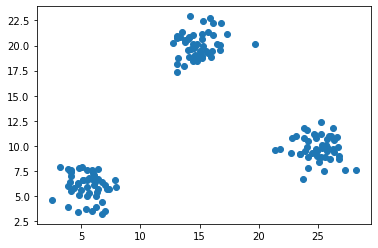

In [17]:
mu1 = np.array([5,6])
mu2 = np.array([25,10])
mu3 = np.array([15,20])
sigma = 2* np.identity(2)
N=50
random.seed(10)
clust1 = np.random.multivariate_normal(mu1,sigma,N)
random.seed(20)
clust2 = np.random.multivariate_normal(mu2,sigma,N)
random.seed(30)

clust3 = np.random.multivariate_normal(mu3,sigma,N)
plt.scatter(x=[clust1[:,0],clust2[:,0],clust3[:,0]],y=[clust1[:,1],clust2[:,1],clust3[:,1]])

In [18]:
#concatenating the data obtained into a single numpy array
x = np.concatenate((clust1,clust2,clust3),axis=0) 

In [20]:
x.shape

(150, 2)

The key idea:

Step 1: random selection of centroids

Step 2: calculate distance to each point and assign each point to cluster

Step 3: calculate average of the assigned points and

Step 4: move centroids to the new position

Step 5: Steps 2-4 until cluster assignment is not changed

In [21]:
#This function returns vector norms
#Eucledian distance
def dist(a, b):
    return np.linalg.norm(a - b)

In [22]:
#def dist_2d(a,b):
#    squared_distance = 0
#    for i in range(len(a)):
#        squared_distance += (a[i] - b[i])**2
#    dist = sqrt(squared_distances)
#    return dist

In [25]:
#Defining the number of clusters
number_of_clusters = 3

In [112]:
# Initializing 3 random cluster centroids
def generate_random_clusters(n_features, k,d):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
                                           # 0.8 to stay in the range (it really doesn't matter as this
                                           #                           is random initialization)
    return c_position

In [114]:
n_features = 2
c_positions = generate_random_clusters(n_features, number_of_clusters,x) 
c_positions = np.array(c_positions).T

In [115]:
# 3 cluster centroid positions
print(c_positions)

[[16 14]
 [21 15]
 [13 16]]


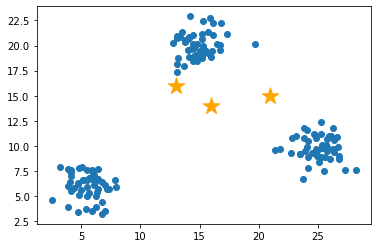

In [116]:
# plotting the clusters along with 3 intialiazed centriods
plt.scatter(x = x[:, 0], y = x[:, 1])
plt.scatter(c_positions[:, 0], c_positions[:, 1], marker='*', s=300, c='orange')
plt.show()

In [117]:
# Error function is defined as distance between new centroids and old centroids
def error(c, c_old):
    return dist(c, c_old)

In [31]:
 # so now we are ready to start K-means we need to loop until error is zero then we can break
def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [dist(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            c_positions[j] = np.mean(points, axis=0)        
        
        error = dist(c_positions, old_clusters)
        
    return c_positions, clusters

In [118]:
from copy import deepcopy

In [119]:
new_clusters, p = kmeans(x, c_positions, number_of_clusters)

In [120]:
# final cluster centroid
print(new_clusters)

[[ 5  6]
 [25  9]
 [14 20]]


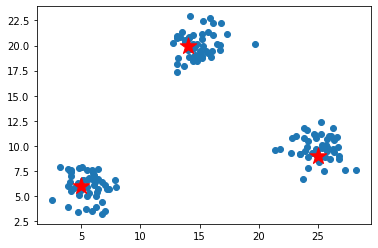

In [121]:
plt.scatter(x = x[:, 0],y =  x[:, 1])
plt.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
plt.show()

In [122]:
def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        plt.scatter(col_points[:, 0], col_points[:, 1], s=10)
    plt.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    plt.show()

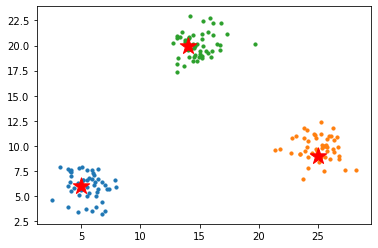

In [123]:
plot_in_col(x, number_of_clusters, p, new_clusters)

In [124]:
 c1 = np.ones((50, 1))
 c2 = 2*np.ones((50, 1))
 c3 = 3*np.ones((50, 1))

In [125]:
clus = np.concatenate((c1,c2,c3),axis=0)

In [126]:
clus.shape

(150, 1)

In [127]:
b= np.concatenate((x,clus),axis=1)

In [128]:
b.shape

(150, 3)

In [129]:
 df = pd.DataFrame(b,pd.RangeIndex(start = 1,stop = 151))

In [130]:
df.tail(10)

,0,1,2
141,16.115072,22.210425,3.0
142,15.739314,21.300544,3.0
143,13.133622,20.752577,3.0
144,13.069465,20.993704,3.0
145,14.478454,20.108967,3.0
146,15.185061,18.803939,3.0
147,15.556285,19.495379,3.0
148,19.660444,20.138089,3.0
149,15.205382,20.625341,3.0
150,15.059695,19.142221,3.0


In [131]:
df.rename(columns={2:'cluster'},inplace=True)

In [196]:
df.head(10)

,0,1,cluster
1,5.507251,5.884597,1.0
2,6.028444,7.301002,1.0
3,4.085758,7.566473,1.0
4,2.513441,4.681683,1.0
5,6.373015,5.477072,1.0
6,5.372191,3.713071,1.0
7,6.401602,7.765510,1.0
8,4.360325,5.844100,1.0
9,6.206196,6.472956,1.0
10,4.834096,7.796116,1.0


In [197]:
w = df.loc[5:10,:]

In [198]:
l = df.loc[65:70,:]

In [199]:
e = df.loc[105:110,:]

In [200]:
test_data = pd.concat([w,l,e])

In [201]:
# Random Test data
test_data

,0,1,cluster
5,6.373015,5.477072,1.0
6,5.372191,3.713071,1.0
7,6.401602,7.765510,1.0
8,4.360325,5.844100,1.0
9,6.206196,6.472956,1.0
10,4.834096,7.796116,1.0
65,23.182180,11.026625,2.0
66,24.500233,9.333060,2.0
67,24.151248,10.472456,2.0
68,24.884586,9.713572,2.0


In [202]:
test = test_data.loc[:,[0,1]]

In [203]:
tests = pd.DataFrame.to_numpy(test)

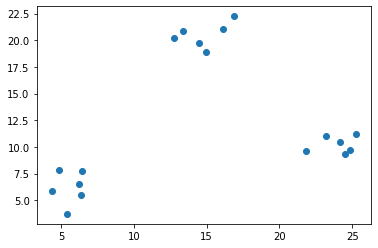

In [206]:
plt.scatter(x = tests[:,0],y=tests[:,1])

In [207]:
n_features = 2
c_positionss = generate_random_clusters(n_features, number_of_clusters,tests) 
c_positionss = np.array(c_positionss).T

In [208]:
new_clusterss, p1 = kmeans(tests, c_positionss, number_of_clusters)

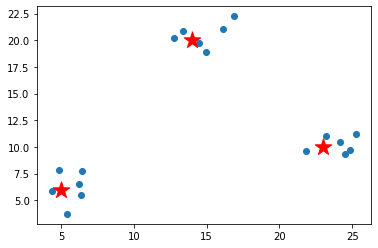

In [209]:
plt.scatter(x = tests[:,0],y = tests[:,1])
plt.scatter(new_clusterss[:, 0], new_clusterss[:, 1], marker='*', s=300, c='r')
plt.show()

In [211]:
test_data

,0,1,cluster
5,6.373015,5.477072,1.0
6,5.372191,3.713071,1.0
7,6.401602,7.765510,1.0
8,4.360325,5.844100,1.0
9,6.206196,6.472956,1.0
10,4.834096,7.796116,1.0
65,23.182180,11.026625,2.0
66,24.500233,9.333060,2.0
67,24.151248,10.472456,2.0
68,24.884586,9.713572,2.0
